In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('datasets/banana_quality.csv')
data.columns

Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [5]:
data.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


In [6]:
X = data.drop('Quality', axis=1)
y = data['Quality']

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [8]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)

In [9]:
X.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8.000000e+03,8.000000e+03,8000.000000,8.000000e+03,8000.000000,8.000000e+03
mean,0.000000,2.842171e-17,-1.136868e-16,0.000000,5.684342e-17,0.000000,5.684342e-17
std,1.000063,1.000063e+00,1.000063e+00,1.000063,1.000063e+00,1.000063,1.000063e+00
min,-3.394498,-3.731497e+00,-2.906996e+00,-3.362996,-3.415275e+00,-3.880626,-3.591165e+00
25%,-0.716259,-7.255427e-01,-6.862817e-01,-0.763172,-6.858731e-01,-0.641071,-7.143236e-01
50%,-0.070094,-5.339774e-02,-1.285453e-01,0.105121,-9.161051e-02,0.086963,3.924874e-02
75%,0.656409,7.622307e-01,5.549729e-01,0.756172,6.303990e-01,0.700304,7.296563e-01
max,4.081954,3.195101e+00,4.264978e+00,3.997893,3.528395e+00,3.059344,3.228027e+00


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

Train a SVM model

In [11]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

Train MLP model

In [12]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(
    hidden_layer_sizes=(10, 5),
    activation='relu',
    solver='adam',
)

In [13]:
mlp_model.fit(X_train, y_train)

/home/oneautumleaf/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 5))

Model Evaluation

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [15]:
svm_predictions = svm_model.predict(X_test)
mlp_predictions = mlp_model.predict(X_test)

In [16]:
# Metrics for SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

# Metrics for MLP
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
mlp_precision = precision_score(y_test, mlp_predictions)
mlp_recall = recall_score(y_test, mlp_predictions)
mlp_f1 = f1_score(y_test, mlp_predictions)

In [17]:
print("\nSVM Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)

print("\nMLP Metrics:")
print("Accuracy:", mlp_accuracy)
print("Precision:", mlp_precision)
print("Recall:", mlp_recall)
print("F1-score:", mlp_f1)


SVM Metrics:
Accuracy: 0.8805
Precision: 0.8513379583746283
Recall: 0.9061181434599156
F1-score: 0.8778742973939705

MLP Metrics:
Accuracy: 0.978
Precision: 0.9778012684989429
Recall: 0.9757383966244726
F1-score: 0.9767687434002111


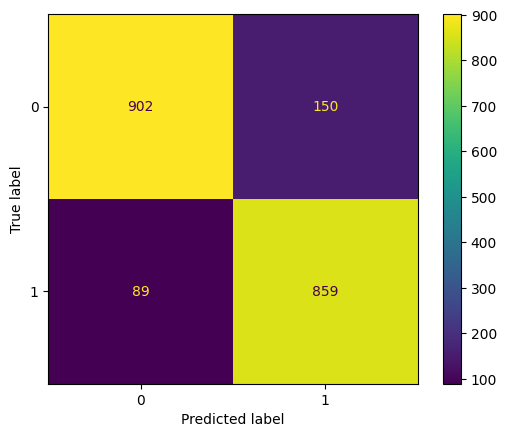

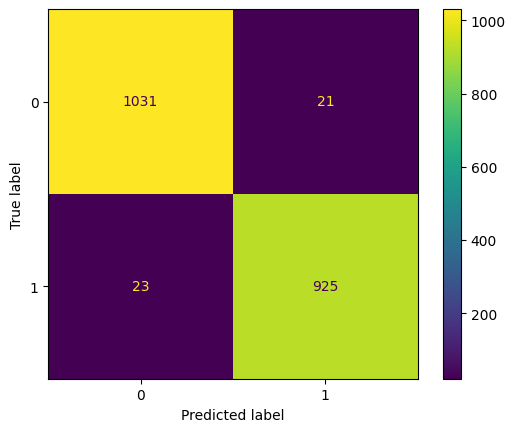

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(svm_conf_matrix).plot()
ConfusionMatrixDisplay(mlp_conf_matrix).plot()